# CAR PRICE PREDICTION

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [2]:
car_df = pd.read_csv('car_dataset.csv')
car_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
car_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4 MB


# Data Cleaning and EDA

In [4]:
car = car_df.dropna()
car = car.drop('Model', axis = 1)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [5]:
car.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


<Axes: xlabel='EngineV', ylabel='Count'>

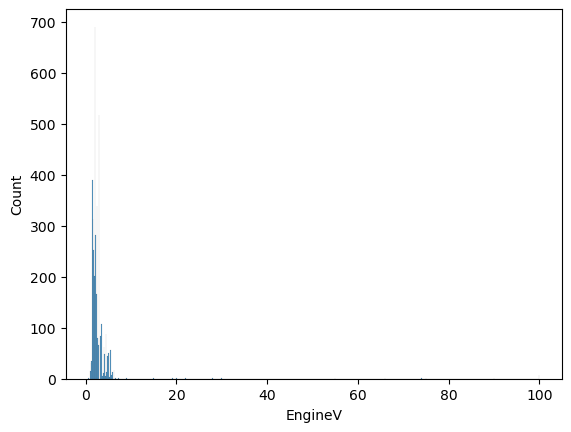

In [6]:
sns.histplot(car['EngineV'])

In [7]:
car = car.loc[car['EngineV'] < 6.5]
car.describe()

,Price,Mileage,EngineV,Year
count,4002.000000,4002.000000,4002.000000,4002.000000
mean,19615.045967,163.384058,2.466724,2006.395302
std,25870.138722,103.476924,0.973586,6.696077
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,6.300000,2016.000000


<Axes: xlabel='EngineV', ylabel='Count'>

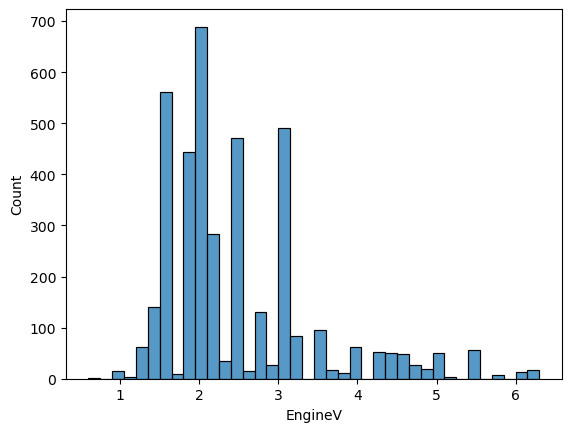

In [8]:
sns.histplot(car['EngineV'])

<Axes: xlabel='Mileage', ylabel='Count'>

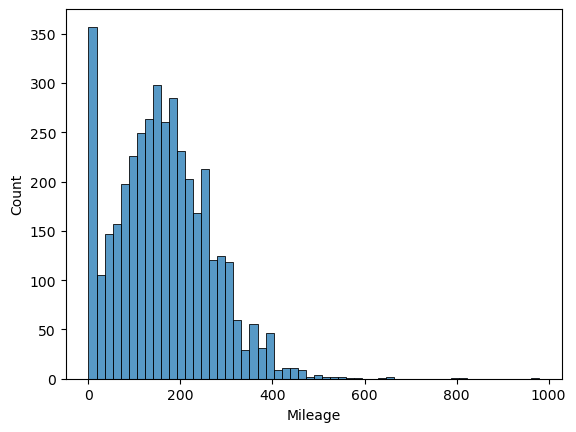

In [9]:
sns.histplot(car['Mileage'])

<Axes: xlabel='Mileage', ylabel='Count'>

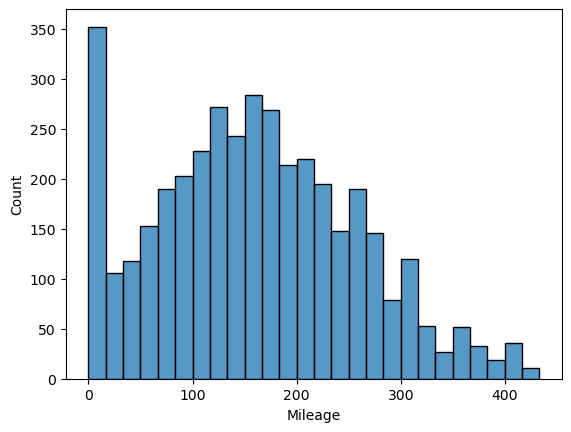

In [10]:
car = car.loc[car['Mileage'] < car['Mileage'].quantile(0.99)]
sns.histplot(car['Mileage'])

<Axes: xlabel='Price', ylabel='Count'>

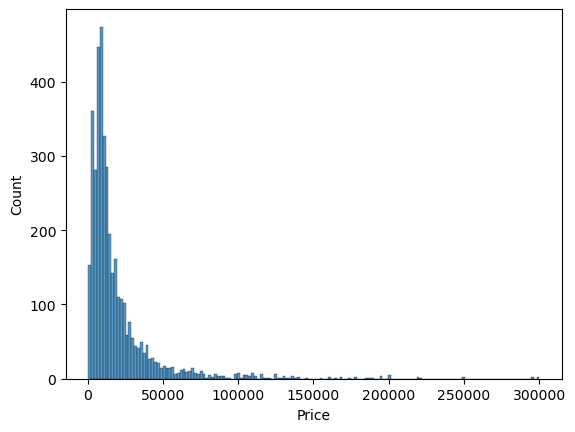

In [11]:
sns.histplot(car['Price'])

<Axes: xlabel='Price', ylabel='Count'>

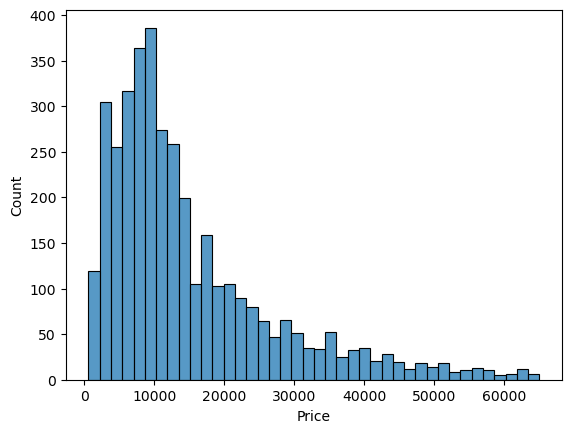

In [12]:
car = car.loc[car['Price'] < car['Price'].quantile(0.95)]
sns.histplot(car['Price'])

In [13]:
car.describe()

,Price,Mileage,EngineV,Year
count,3762.000000,3762.000000,3762.000000,3762.000000
mean,15063.642254,167.274588,2.401906,2006.055290
std,12273.344566,93.068531,0.917379,6.486615
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,100.000000,1.800000,2002.000000
50%,10999.000000,161.000000,2.000000,2007.000000
75%,19500.000000,230.000000,3.000000,2011.000000
max,64999.000000,433.000000,6.300000,2016.000000


<Axes: >

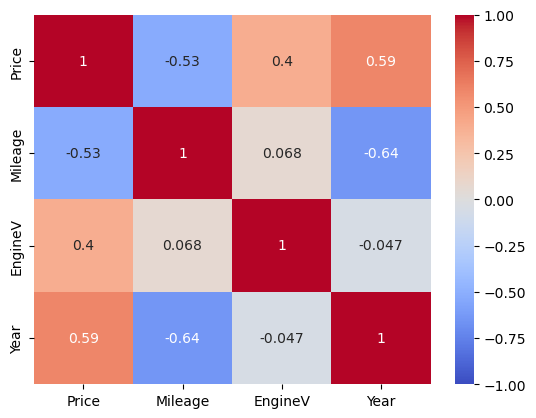

In [14]:
sns.heatmap(car.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

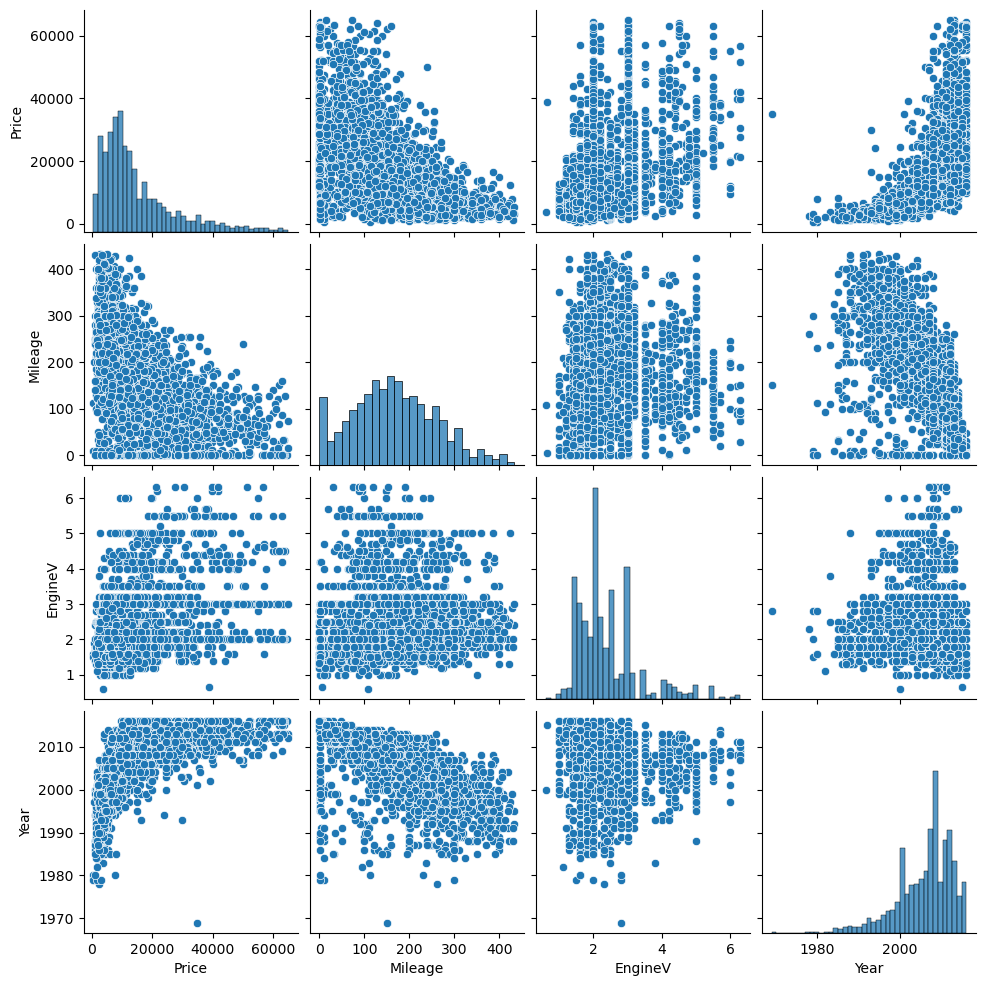

In [15]:
sns.pairplot(car)

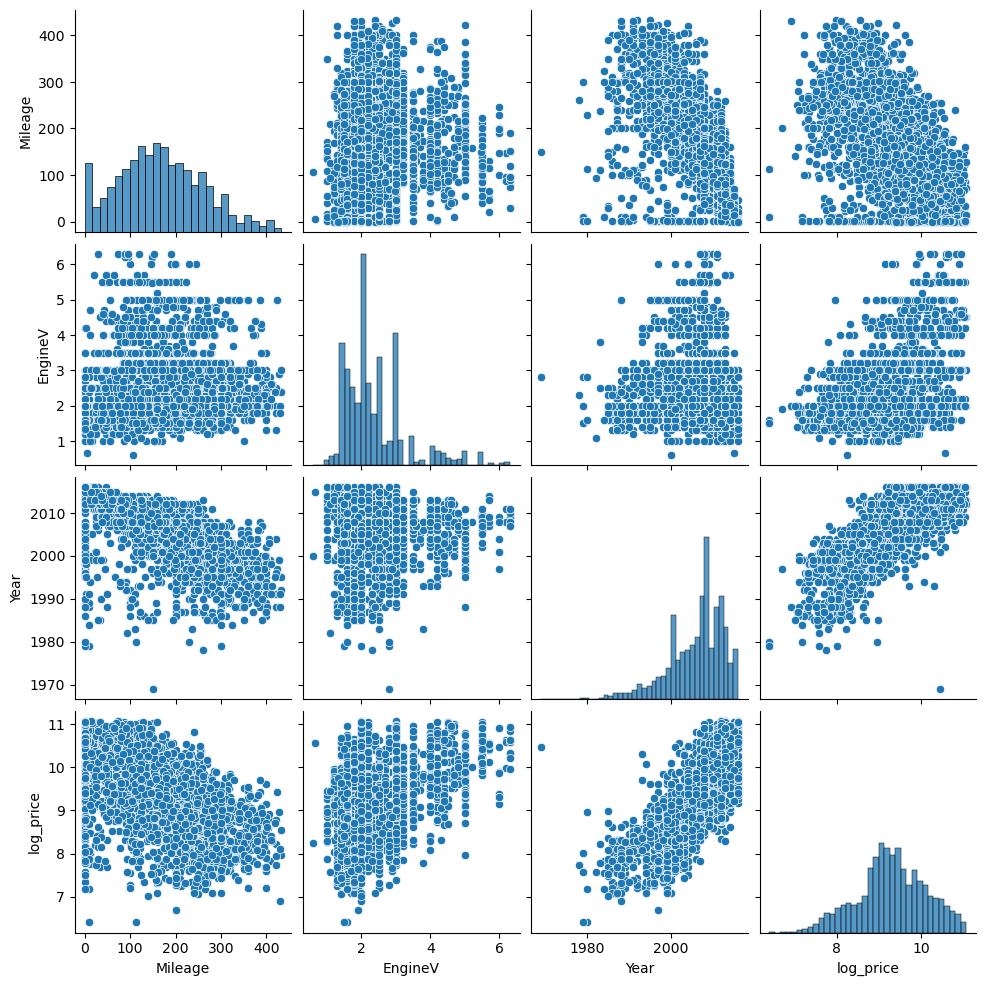

In [16]:
car['log_price'] = np.log(car['Price'])
sns.pairplot(car.drop('Price', axis = 1))

<Axes: xlabel='Brand'>

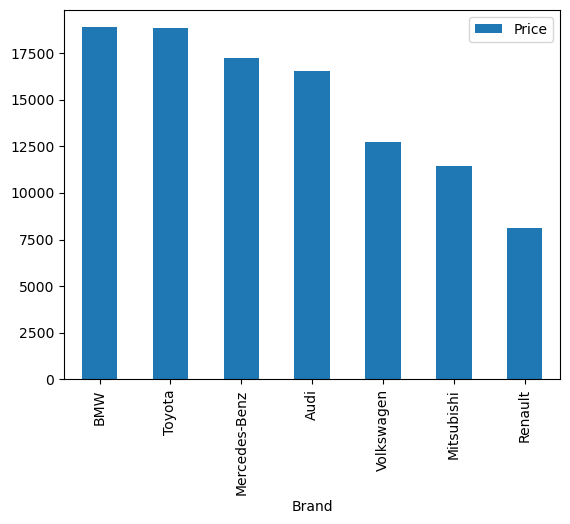

In [17]:
car.groupby('Brand').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

<Axes: xlabel='Body'>

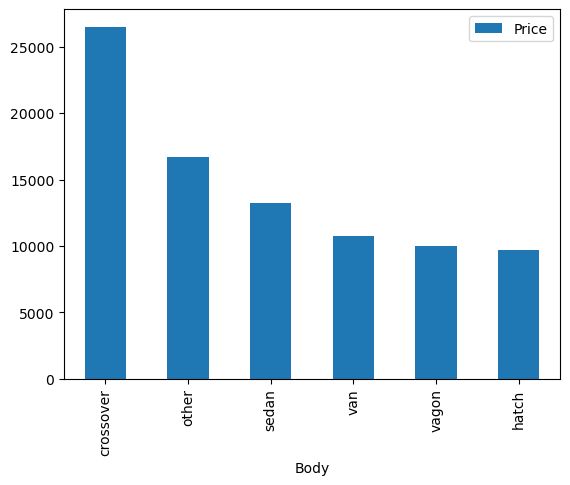

In [18]:
car.groupby('Body').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

<Axes: xlabel='Engine Type'>

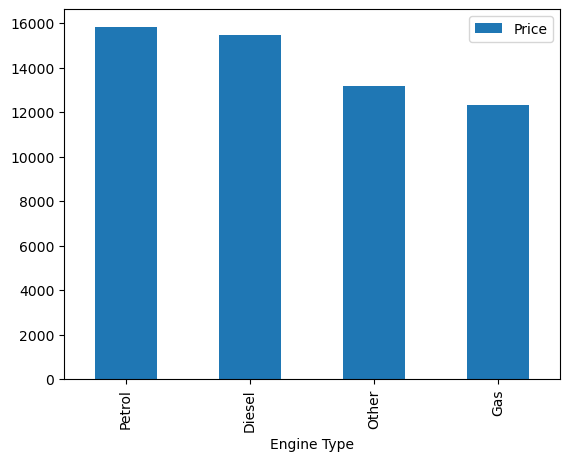

In [19]:
car.groupby('Engine Type').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

<Axes: xlabel='Registration'>

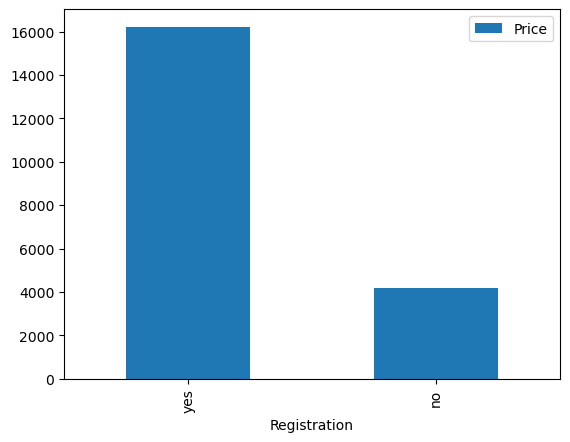

In [20]:
car.groupby('Registration').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

In [21]:
car = car.drop(['Price'], axis = 1)

In [22]:
df = pd.get_dummies(car, drop_first = True)
df

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,2008,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,2014,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4341,1,3.5,1999,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,194,2.0,1985,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Model Fitting

In [23]:
X = sm.add_constant(df.drop('log_price', axis = 1))
y = df['log_price']

In [24]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1193.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:05:34   Log-Likelihood:                -472.34
No. Observations:                3009   AIC:                             982.7
Df Residuals:                    2990   BIC:                             1097.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -149.1830      2.254    -66.173      0.000    -153.603    -144.763
Mileage                -0.0008   7.86e-05    -10.637      0.000      -0.001      -0.001
EngineV                 0.2148      0.007     29.657      0.000       0.201       0.229
Year                    0.0787      0.001     70.254      0.000       0.076       0.081
Brand_BMW               0.0909      0.021      4.320      0.000       0.050       0.132
Brand_Mercedes-Benz    -0.0248      0.021     -1.190      0.234      -0.066       0.016
Brand_Mitsubishi       -0.4585      0.026    -17.913      0.000      -0.509      -0.408
Brand_Renault          -0.5944      0.024    -24.795      0.000      -0.641      -0.547
Brand_Toyota           -0.1861      0.023     -8.089      0.000      -0.231      -0.141
Brand_Volkswagen       -0.2073      0.021    -10.057      0.000      -0.248      -0.167
Body_hatch             -0.3775      0.026    -14.293      0.000      -0.429      -0.326
Body_other             -0.2386      0.022    -10.835      0.000      -0.282      -0.195
Body_sedan             -0.2950      0.017    -17.317      0.000      -0.328      -0.262
Body_vagon             -0.3451      0.023    -14.759      0.000      -0.391      -0.299
Body_van               -0.4391      0.022    -19.923      0.000      -0.482      -0.396
Engine Type_Gas        -0.1019      0.018     -5.743      0.000      -0.137      -0.067
Engine Type_Other      -0.0614      0.034     -1.816      0.070      -0.128       0.005
Engine Type_Petrol     -0.1014      0.014     -7.222      0.000      -0.129      -0.074
Registration_yes        0.8815      0.019     46.493      0.000       0.844       0.919
==============================================================================
Omnibus:                      309.514   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1722.955
Skew:                          -0.321   Prob(JB):                         0.00
Kurtosis:                       6.651   Cond. No.                     8.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print(f"train R2: {r2(y, lm.predict(X))}")
print(f"train rmse: {mse(np.exp(y), np.exp(lm.predict(X)), squared = False)}")

train R2: 0.8778078615205851
train rmse: 5234.40325181682


# Checking Assumptions

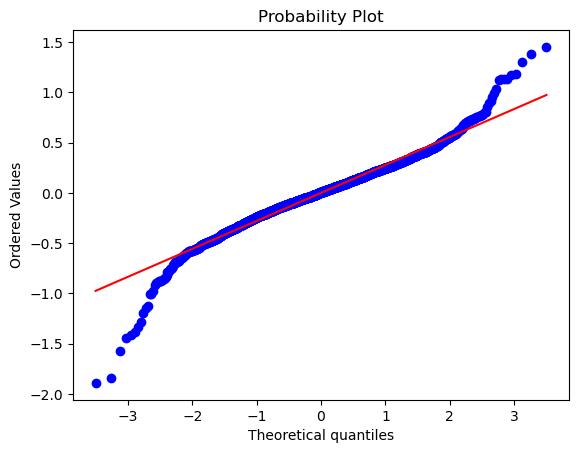

In [27]:
#Normality of errors
from scipy import stats
stats.probplot(lm.resid, dist = 'norm', plot = plt);

<Axes: xlabel='log_price'>

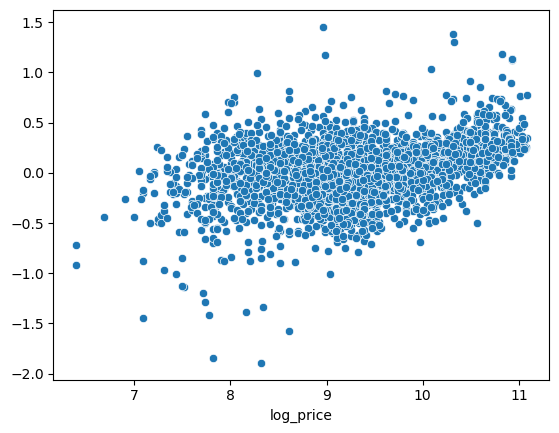

In [28]:
#Equal variance of errors

sns.scatterplot(x = 'log_price', y = lm.resid, data = car)

In [29]:
#Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y, X).exog
pd.Series([vif(variables, i) for i in range(variables.shape[1])])

0     189615.497228
1          2.006563
2          1.611909
3          1.952903
4          2.166224
5          2.484867
6          1.834707
7          2.279810
8          2.165161
9          2.738550
10         1.719069
11         1.599646
12         2.574362
13         1.841658
14         2.438217
15         1.496290
16         1.063314
17         1.703979
18         1.185859
dtype: float64

In [30]:
#Outliers Influence

lm.get_influence().summary_frame().loc[:,'cooks_d'].round(2).sort_values(ascending = False)

2676    0.02
3705    0.02
3346    0.02
752     0.01
3561    0.01
        ... 
437     0.00
739     0.00
3977    0.00
3020    0.00
3153    0.00
Name: cooks_d, Length: 3009, dtype: float64

# Model Evaluation

In [31]:
print(f"test R2: {r2(y_test, lm.predict(X_test))}")
print(f"test rmse: {mse(np.exp(y_test), np.exp(lm.predict(X_test)), squared = False)}")

test R2: 0.861956987847651
test rmse: 5704.0378922278
